In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('meteorite_data_m.csv')

In [98]:
df.head()

,Name of Earth Meteorite,ID of Earth Meteorite,Name Type,Rec Class,Mass (g),Year,Latitude,Longitude
0,Aachen,1,Valid,L5,21.0,1880-01-01 00:00:00,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951-01-01 00:00:00,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952-01-01 00:00:00,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01 00:00:00,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,1902-01-01 00:00:00,-33.16667,-64.95000


In [99]:
df = df.rename(columns={'Mass (g)': 'Mass'})
df = df.rename(columns={'Name of Earth Meteorite': 'Name'})
df = df.rename(columns={'ID of Earth Meteorite': 'ID'})

In [100]:
df.shape

(1000, 8)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   ID         1000 non-null   int64  
 2   Name Type  1000 non-null   object 
 3   Rec Class  1000 non-null   object 
 4   Mass       972 non-null    float64
 5   Year       999 non-null    object 
 6   Latitude   988 non-null    float64
 7   Longitude  988 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [102]:
df[df['Mass'] == 23000000.0]

,Name,ID,Name Type,Rec Class,Mass,Year,Latitude,Longitude
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,1947-01-01 00:00:00,46.16,134.65333


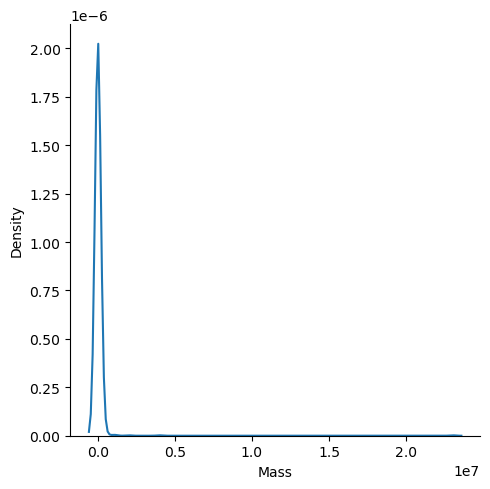

In [103]:
sns.displot(data=df, x="Mass", kind="kde")

In [104]:
df.dropna(subset = ['Year', 'Latitude', 'Longitude','Mass'], inplace = True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       959 non-null    object 
 1   ID         959 non-null    int64  
 2   Name Type  959 non-null    object 
 3   Rec Class  959 non-null    object 
 4   Mass       959 non-null    float64
 5   Year       959 non-null    object 
 6   Latitude   959 non-null    float64
 7   Longitude  959 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 67.4+ KB


## Question 1

In [106]:
df['Year'][100]


'1949-01-01 00:00:00'

In [108]:
## We need to extract only the year value from Year column
df['Year'] = df['Year'].str.split('-').str[0]

In [110]:
names_before_2000 = df.loc[df['Year'].astype(int) < 2000, 'Name']

In [111]:
len(names_before_2000)

893

In [112]:
names_before_2000

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
994     Timochin
995     Tirupati
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: Name, Length: 893, dtype: object

In [113]:
df.head()

,Name,ID,Name Type,Rec Class,Mass,Year,Latitude,Longitude
0,Aachen,1,Valid,L5,21.0,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,1902,-33.16667,-64.95000


## Question 2

In [124]:
# lat, long = df.loc[df['Year'].astype(int) < 2000]['Latitude','Longitude']
new_df = df[df['Year'].astype(int) < 1970]

In [127]:
coordinates = new_df[['Latitude', 'Longitude']]

In [128]:
coordinatesZ

,Latitude,Longitude
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


## Question 3

In [144]:
mass_df = df[df['Mass'] > 10000.0]

In [147]:
names_with_mass = mass_df['Name'].values

In [142]:
# names_with_mass = names_with_mass['Name']

In [148]:
names_with_mass

array(['Abee', 'Agen', 'Aïr', 'Akyumak', 'Alfianello', 'Allegan',
       'Allende', 'Andura', 'Appley Bridge', 'Aumale', 'Ausson',
       'Bachmut', 'Bahjoi', 'Ban Rong Du', 'Bandong', 'Bansur', 'Barwell',
       'Bassikounou', 'Baszkówka', 'Bath', 'Bath Furnace', 'Beardsley',
       'Beaver Creek', 'Benguerir', "Beni M'hira", 'Bensour', 'Béréba',
       'Bilanga', 'Bjurböle', 'Boguslavka', 'Braunau', 'Bruderheim',
       'Bur-Gheluai', 'Bursa', 'Butsura', 'Buzzard Coulee',
       'Cabezo de Mayo', 'Cabin Creek', 'Campos Sales', 'Cangas de Onis',
       'Castrovillari', 'Chajari', 'Chantonnay', 'Charsonville',
       'Charwallas', 'Château-Renard', 'Chelyabinsk', 'Chergach ',
       'Colby (Wisconsin)', 'Conquista', 'Cumberland Falls', 'Dahmani',
       'Demina', 'Dergaon', 'Desuri', 'Devgaon', 'Dhajala', 'Dhurmsala',
       'Djati-Pengilon', 'Dong Ujimqin Qi', 'Dresden (Ontario)', 'Durala',
       'El Paso de Aguila', 'Elbogen', 'Elenovka', 'Ensisheim', 'Ergheo',
       'Estherville',